### Scaling of covariance matrix errors with number of simulations

This notebook is designed to investigate how the error on the covariance matrix scales with number of simulations with and without additional MOPED data compression. This is based on the work/formulae in [Taylor et al., 2012](https://ui.adsabs.harvard.edu/abs/2007A%26A...464..399H/abstract), in particular the fractional bias on the precision matrix
$$B = \frac{\sum_{k}\langle \Psi_{k} \rangle}{\sum_{k} \Psi_{k} } - 1$$
and fractional error on the trace of the covariance and precision matrices
$$E_{C} = \frac{\sum_{k} \sigma(C_{k})}{\sum_{k} C_{k}} \qquad E_{\Psi} = \sqrt{\frac{\sum_{k} \sigma^{2}(\Psi_{k})}{\sum_{k} \Psi^{2}_{k}}}$$

Let's start by generating some Gaussian realisations from a known covariance matrix

In [69]:
import numpy as np

ns = 2000                      # The number of 'simulations'
nk = 30                        # Number of modes
cov = np.diag(np.arange(nk)+1) # Covariance matrix
invcov = np.linalg.inv(cov)    # Precision matrix

# Check the inverse went well
v = np.diag(cov @ invcov)
if not np.all(np.isclose(v, 1)):
    print("ERROR, setting an inappropriate covariance matrix that is almost singular!!!!")
    
data = np.random.multivariate_normal(np.zeros(nk), cov, ns)

Now let's investigate how well we can estimate the true precision matrix from our set of simulations. We'll generate a bunch of jackknife samples for different subsets of the data and then take the mean and standard deviation of those jackknife samples

In [73]:
# Set up the different numbers of simulations to test
nsbins = 37    
njack = 250
nstest = np.linspace(200, 2000, nsbins).astype(int)

# For each number of simulations compute the estimates, average and std of the covariance/precision matrices
meancov, stdcov = np.empty(nsbins), np.empty(nsbins)
meanicov, meanicovsq, stdicov = np.empty(nsbins), np.empty(nsbins), np.empty(nsbins)
for i, n in enumerate(nstest):
    testindex = np.random.choice(ns, (n, njack))
    testdata = data[testindex]
    covtest = np.array([np.cov(testdata[:,j], rowvar=False) for j in range(njack)])
    icovtest = np.array([np.linalg.inv(covtest[j]) for j in range(njack)])
    meancov[i] = np.sum(np.diag(np.mean(covtest, axis=0)))
    meanicov[i] = np.sum(np.diag(np.mean(icovtest, axis=0)))
    meanicovsq[i] = np.sum(np.diag(np.mean(icovtest, axis=0))**2)
    stdcov[i] = np.sum(np.diag(np.std(covtest, axis=0)))
    stdicov[i] = np.sum(np.diag(np.std(icovtest, axis=0)**2))
    print(i, n, meancov[i], stdcov[i], meanicov[i], meanicovsq[i], stdicov[i])

0 200 465.53340311358124 45.7335635143127 4.706413299438451 2.135730552807789 0.02408445869689874
1 250 465.4915011666074 40.881826650838 4.540783814705603 1.9759428804658954 0.018037132256381518
2 300 465.14211439276835 37.39768703850712 4.429484997558846 1.883793109516304 0.014632105950234139
3 350 464.6229425661237 35.04335736244982 4.360986807222476 1.8339054128961767 0.010716701284491044
4 400 465.81491611198953 32.11384225912882 4.301928010239791 1.776549652373013 0.009503271350977975
5 450 466.35711355677483 30.65408193153466 4.2618936646872925 1.744131534658695 0.008115313606182945
6 500 466.6360419137642 29.418294117891005 4.234181986155458 1.723452651789111 0.007087071744301458
7 550 465.7569369103029 27.903231005435448 4.198289344552333 1.6811740361441847 0.006824762991067562
8 600 465.5912481809786 26.879745680801033 4.180009371336607 1.6629065090727237 0.005546803596514554
9 650 465.27987536873707 25.63645671404124 4.1691123188246095 1.6641247859130812 0.005296376296871055

Now let's plot the analytic expectation for the fractional bias and error on the covariance matrix against the numerical calculations. The analytic expectations are
$$B = \frac{N_{s} - 1}{N_{s} - N_{k} - 2} - 1 \qquad E_{C} = \sqrt{\frac{2}{N_{s}-1}} \qquad E_{\Psi} = \sqrt{\frac{2}{N_{s} - N_{k} - 2}}$$

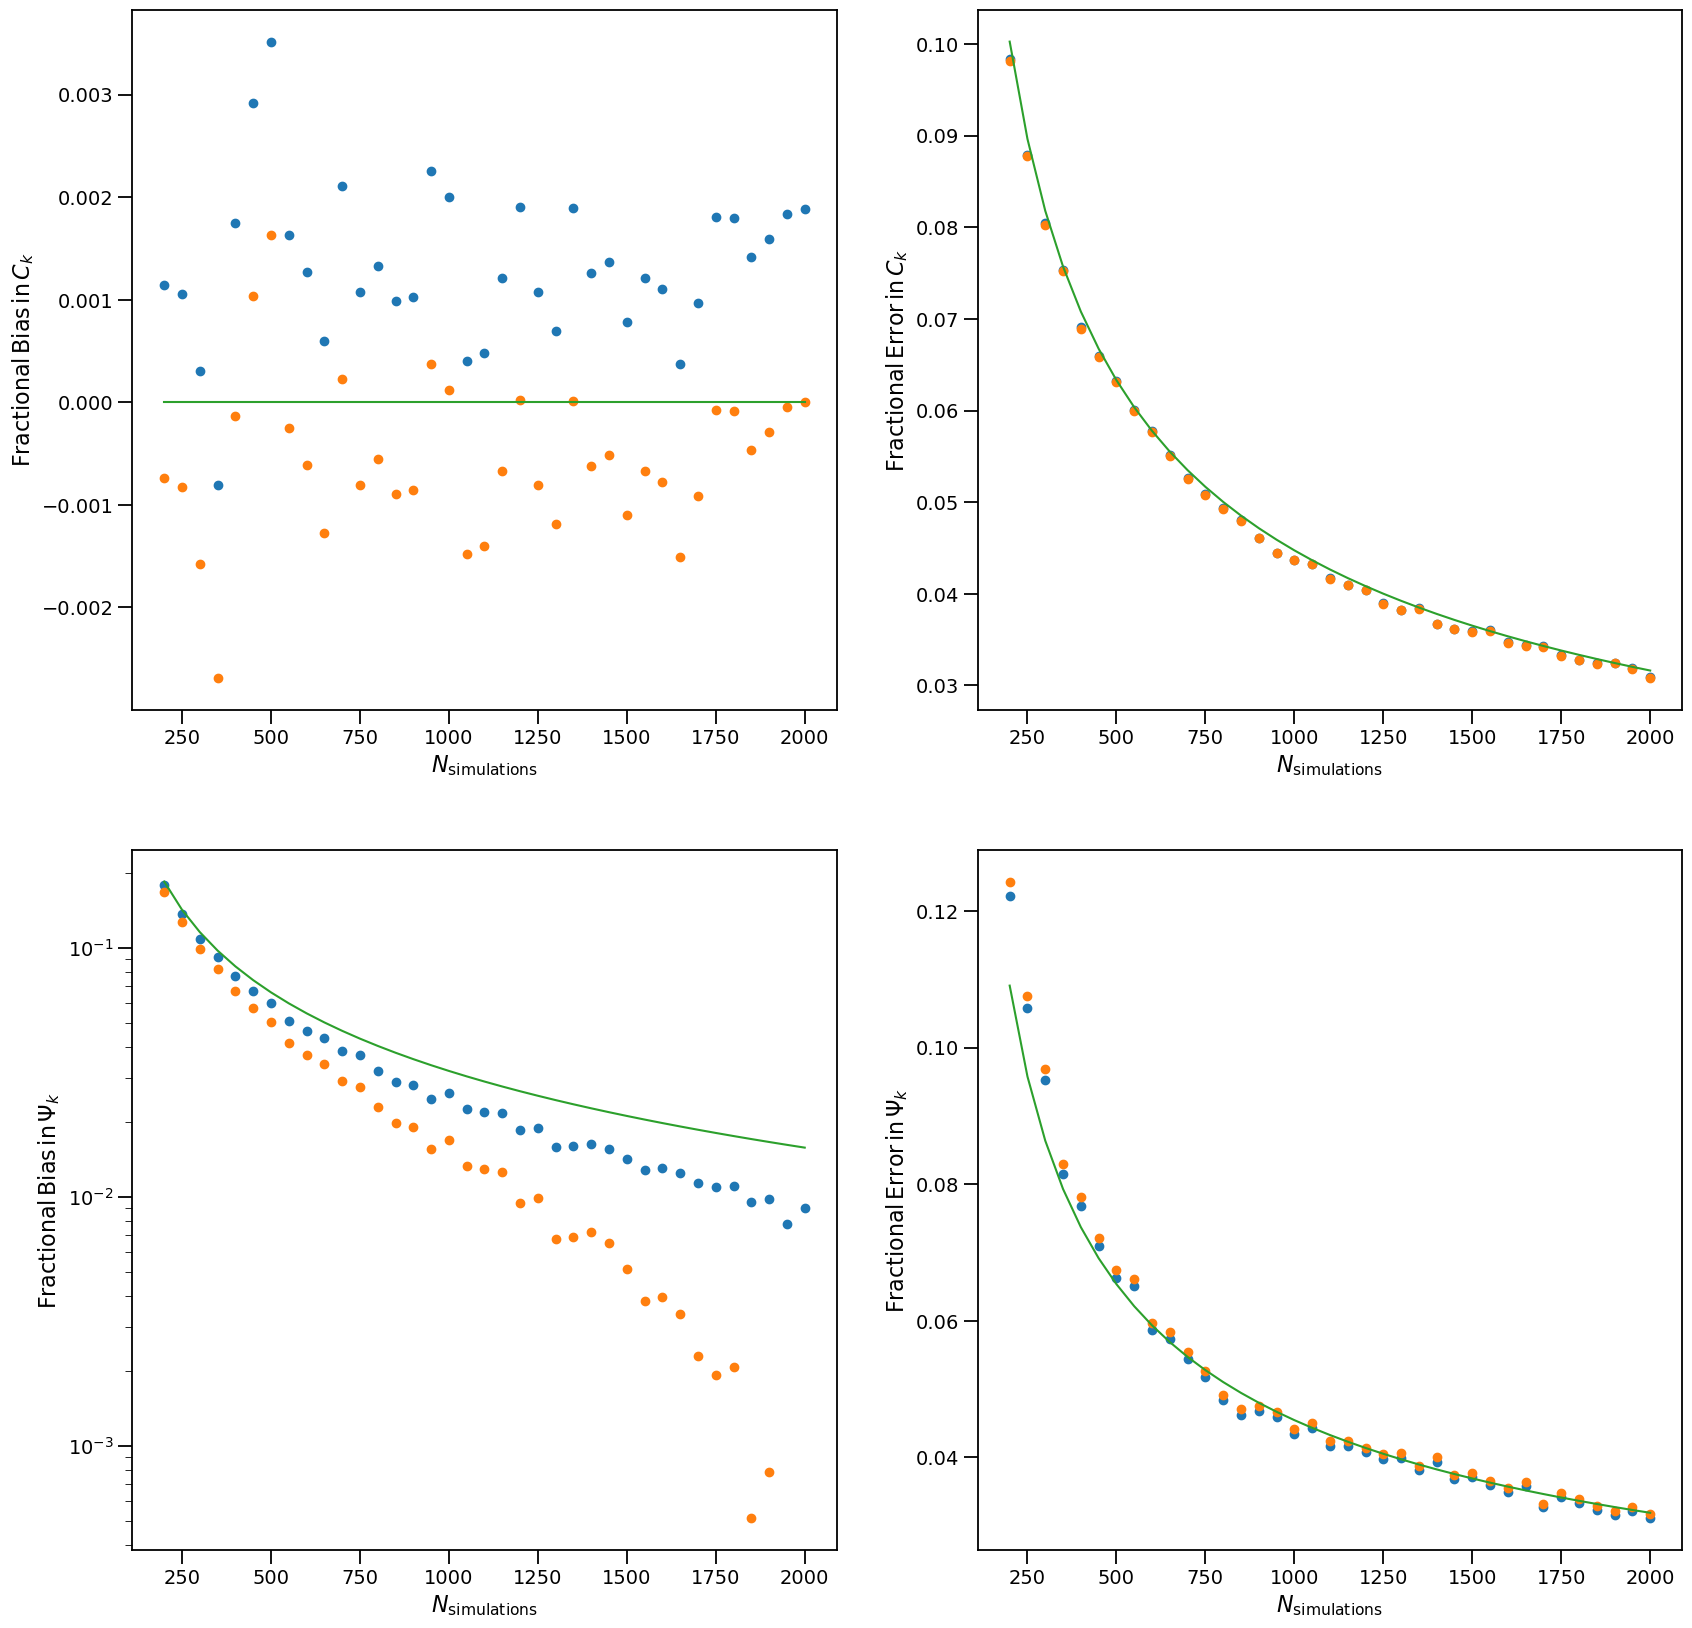

In [75]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20))
ax1.plot(nstest, meancov/np.sum(np.diag(cov)) - 1.0, ls='None', marker='o')
ax1.plot(nstest, meancov/meancov[-1] - 1.0, ls='None', marker='o')
ax1.plot(nstest, np.zeros(len(nstest)), ls='-', marker='None')
ax1.set_xlabel(r'$N_{\mathrm{simulations}}$', fontsize=16)
ax1.set_ylabel(r'$\mathrm{Fractional\,Bias\,in\,}C_{k}$', fontsize=16)
ax1.tick_params(width=1.3)
ax1.tick_params('both',length=10, which='major')
ax1.tick_params('both',length=5, which='minor')
for axis in ['top','left','bottom','right']:
    ax1.spines[axis].set_linewidth(1.3)
for tick in ax1.xaxis.get_ticklabels():
    tick.set_fontsize(14)
for tick in ax1.yaxis.get_ticklabels():
    tick.set_fontsize(14)

ax2.plot(nstest, stdcov/np.sum(np.diag(cov)), ls='None', marker='o')
ax2.plot(nstest, stdcov/meancov[-1], ls='None', marker='o')
ax2.plot(nstest, np.sqrt(2.0/(nstest - 1.0)), ls='-', marker='None')
ax2.set_xlabel(r'$N_{\mathrm{simulations}}$', fontsize=16)
ax2.set_ylabel(r'$\mathrm{Fractional\,Error\,in\,}C_{k}$', fontsize=16)
ax2.tick_params(width=1.3)
ax2.tick_params('both',length=10, which='major')
ax2.tick_params('both',length=5, which='minor')
for axis in ['top','left','bottom','right']:
    ax2.spines[axis].set_linewidth(1.3)
for tick in ax2.xaxis.get_ticklabels():
    tick.set_fontsize(14)
for tick in ax2.yaxis.get_ticklabels():
    tick.set_fontsize(14)
    
ax3.plot(nstest, meanicov/np.sum(np.diag(invcov)) - 1.0, ls='None', marker='o')
ax3.plot(nstest, meanicov/meanicov[-1] - 1.0, ls='None', marker='o')
ax3.plot(nstest, (nstest - 1.0)/(nstest - nk - 2.0) - 1.0, ls='-', marker='None')
ax3.set_xlabel(r'$N_{\mathrm{simulations}}$', fontsize=16)
ax3.set_ylabel(r'$\mathrm{Fractional\,Bias\,in\,}\Psi_{k}$', fontsize=16)
ax3.tick_params(width=1.3)
ax3.tick_params('both',length=10, which='major')
ax3.tick_params('both',length=5, which='minor')
for axis in ['top','left','bottom','right']:
    ax3.spines[axis].set_linewidth(1.3)
for tick in ax3.xaxis.get_ticklabels():
    tick.set_fontsize(14)
for tick in ax3.yaxis.get_ticklabels():
    tick.set_fontsize(14)
ax3.set_yscale('log')

ax4.plot(nstest, np.sqrt(stdicov/np.sum(np.diag(invcov**2))), ls='None', marker='o')
ax4.plot(nstest, np.sqrt(stdicov/meanicovsq[-1]), ls='None', marker='o')
ax4.plot(nstest, np.sqrt(2.0/(nstest - nk - 2.0)), ls='-', marker='None')
ax4.set_xlabel(r'$N_{\mathrm{simulations}}$', fontsize=16)
ax4.set_ylabel(r'$\mathrm{Fractional\,Error\,in\,}\Psi_{k}$', fontsize=16)
ax4.tick_params(width=1.3)
ax4.tick_params('both',length=10, which='major')
ax4.tick_params('both',length=5, which='minor')
for axis in ['top','left','bottom','right']:
    ax4.spines[axis].set_linewidth(1.3)
for tick in ax4.xaxis.get_ticklabels():
    tick.set_fontsize(14)
for tick in ax4.yaxis.get_ticklabels():
    tick.set_fontsize(14)
